In [1]:
# Import Libraries

# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# For Latitudes and Longitudes
!conda install -c conda-forge geopy --yes 
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#For Map
!conda install -c conda-forge folium=0.5.0 --yes 
# map rendering library
import folium 

#For Tables
!pip install lxml
import lxml

import seaborn as sns

import csv
! pip install BeautifulSoup4
from bs4 import BeautifulSoup
import itertools
import os

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    nu

In [2]:
USA_data = pd.read_csv('uscities.csv')
USA_data.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [3]:
USA_data.shape
print('The dataframe has', USA_data.shape, 'rows and columns respectively.')

The dataframe has (28889, 19) rows and columns respectively.


In [4]:
USA_data.rename(columns={'state_id': 'State', 'state_name': 'State Name', 'city': 'City','county_name':'County', 'county_fips':'County Code', 'city_ascii':'Neighborhood', 'population' :'Population', 'density': 'Density', 'lat' : 'Latitude', 'lng': 'Longitude', 'zips':'Zip Code'}, inplace=True)
USA_data.head()

,City,Neighborhood,State,State Name,County Code,County,county_fips_all,county_name_all,Latitude,Longitude,Population,Density,source,military,incorporated,timezone,ranking,Zip Code,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [5]:
NC_data = USA_data[USA_data.State == 'NC']
NC_data.head()

,City,Neighborhood,State,State Name,County Code,County,county_fips_all,county_name_all,Latitude,Longitude,Population,Density,source,military,incorporated,timezone,ranking,Zip Code,id
6677,Trenton,Trenton,NC,North Carolina,37103,Jones,37103,Jones,35.0640,-77.3553,285.0,484.0,polygon,False,True,America/New_York,3,28585,1840061975
6678,Stanfield,Stanfield,NC,North Carolina,37167,Stanly,37167,Stanly,35.2336,-80.4303,1517.0,131.0,polygon,False,True,America/New_York,3,28163,1840064499
6679,Sanford,Sanford,NC,North Carolina,37105,Lee,37105,Lee,35.4874,-79.1772,34557.0,389.0,polygon,False,True,America/New_York,3,27330 27332 27331,1840064038
6680,Cofield,Cofield,NC,North Carolina,37091,Hertford,37091,Hertford,36.3567,-76.9105,382.0,46.0,polygon,False,True,America/New_York,3,27922,1840061224
6681,Thomasville,Thomasville,NC,North Carolina,37057,Davidson,37057,Davidson,35.8813,-80.0807,26615.0,612.0,polygon,False,True,America/New_York,3,27360 27361,1840064227


In [6]:
# Save NC State data as csv file
NC_data.to_csv('NC_data.csv')

In [7]:
cols = [1,0,2,5,8,9,10,11,17]
NC_data = NC_data[NC_data.columns[cols]]
NC_data.head().reset_index()

,index,Neighborhood,City,State,County,Latitude,Longitude,Population,Density,Zip Code
0,6677,Trenton,Trenton,NC,Jones,35.0640,-77.3553,285.0,484.0,28585
1,6678,Stanfield,Stanfield,NC,Stanly,35.2336,-80.4303,1517.0,131.0,28163
2,6679,Sanford,Sanford,NC,Lee,35.4874,-79.1772,34557.0,389.0,27330 27332 27331
3,6680,Cofield,Cofield,NC,Hertford,36.3567,-76.9105,382.0,46.0,27922
4,6681,Thomasville,Thomasville,NC,Davidson,35.8813,-80.0807,26615.0,612.0,27360 27361


In [8]:
NC_data.shape
print('The dataframe has', NC_data.shape, 'rows and columns respectively.')

The dataframe has (736, 9) rows and columns respectively.


In [9]:
address = '1800 Pineville-Matthews Road, Charlotte,NC 27412'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
Latitude = location.latitude
Longitude = location.longitude
print('The geograpical coordinates of Providence High School, Charlotte, NC 27412 are {}, {}.'.format(Latitude, Longitude))

The geograpical coordinates of Providence High School, Charlotte, NC 27412 are 35.110148, -80.761796.


In [10]:
# create map of North Carolina using latitude and longitude values
NC_State_map = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(NC_data['Latitude'], NC_data['Longitude'], NC_data['Neighborhood'],  NC_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        ).add_to(NC_State_map) 
NC_State_map

In [11]:
# Save NC_map
NC_State_map.save('NC_State_map.html')

In [12]:
School_data = pd.read_csv('School_Grades.csv')
School_data.head(5)

,School Name,Street Address,Zip,City,Neighborhood,Grade,Median Rent ($),Median Home Value ($),Latitude,Longitude
0,Ardrey Kell HS,2401 Belfast Dr,28208,Charlotte,Provincetowne,A,1572.0,287402.0,35.029990,-80.826650
1,Cato HS,6108 Wilora Lake Rd,28212,Charlotte,Back Creek Church Road,A,1112.0,210229.0,35.264861,-80.731168
2,David W. Butler HS,1810 Matthews-Mint Hill Rd,28105,Matthews,Matthews,B,1153.0,231300.0,35.120282,-80.691593
3,East Mecklenburg HS,6800 Monroe Rd,28212,Charlotte,East Forest,B,955.0,99587.0,35.176007,-80.757978
4,Garinger HS,1100 Eastway Dr,28205,Charlotte,Plaza-Shamrock,C,817.0,133512.0,35.241087,-80.782875


In [13]:
School_data.rename(columns={ 'Grade': 'Rank','Latitude' : 'Lat', 'Longitude': 'Long'}, inplace=True)
School_data.head(25)

,School Name,Street Address,Zip,City,Neighborhood,Rank,Median Rent ($),Median Home Value ($),Lat,Long
0,Ardrey Kell HS,2401 Belfast Dr,28208,Charlotte,Provincetowne,A,1572.0,287402.0,35.029990,-80.826650
1,Cato HS,6108 Wilora Lake Rd,28212,Charlotte,Back Creek Church Road,A,1112.0,210229.0,35.264861,-80.731168
2,David W. Butler HS,1810 Matthews-Mint Hill Rd,28105,Matthews,Matthews,B,1153.0,231300.0,35.120282,-80.691593
3,East Mecklenburg HS,6800 Monroe Rd,28212,Charlotte,East Forest,B,955.0,99587.0,35.176007,-80.757978
4,Garinger HS,1100 Eastway Dr,28205,Charlotte,Plaza-Shamrock,C,817.0,133512.0,35.241087,-80.782875
5,Harding University HS,15410 Stumptown Rd,28078,Huntersville,Westerly Hills,D,751.0,75658.0,35.236590,-80.902644
6,Harper Middle College High,315 West Hebron Street,28273,Charlotte,Montclaire South,A,919.0,117686.0,35.105820,-80.694511
7,Hopewell HS,11530 Beatties Ford Rd,28078,Huntersville,Huntersville,C,1201.0,270100.0,35.378392,-80.911004
8,Independence HS,7101 Idlewild Rd,28212,Charlotte,Mint Hill,B,1035.0,234800.0,35.197168,-80.687432
9,Levine Middle College High,6400 Prett Ct,28270,Matthews,Matthews,A,1153.0,231300.0,35.106354,-80.693886


In [14]:
# Save NC_School_data as csv file
School_data.to_csv('NC_HS_data.csv')

In [15]:
School_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
School Name              22 non-null object
Street Address           22 non-null object
Zip                      22 non-null int64
City                     22 non-null object
Neighborhood             22 non-null object
Rank                     22 non-null object
Median Rent ($)          22 non-null float64
Median Home Value ($)    22 non-null float64
Lat                      22 non-null float64
Long                     22 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.8+ KB


In [16]:
School_data.describe()

,Zip,Median Rent ($),Median Home Value ($),Lat,Long
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28187.636364,1135.863636,198479.500000,35.220241,-80.804918
std,76.014125,212.904248,93365.386202,0.107950,0.090257
min,28031.000000,751.000000,68800.000000,35.029990,-80.952937
25%,28129.250000,978.750000,121642.500000,35.129777,-80.860347
50%,28210.000000,1124.500000,195150.000000,35.216776,-80.829141
75%,28224.250000,1198.500000,256569.500000,35.265268,-80.737871
max,28273.000000,1572.000000,467715.000000,35.469489,-80.640044


In [17]:
School_data.corr()

,Zip,Median Rent ($),Median Home Value ($),Lat,Long
Zip,1.000000,-0.083323,0.088484,-0.733747,0.286100
Median Rent ($),-0.083323,1.000000,0.202364,0.016274,-0.034344
Median Home Value ($),0.088484,0.202364,1.000000,-0.208180,0.156031
Lat,-0.733747,0.016274,-0.208180,1.000000,-0.323892
Long,0.286100,-0.034344,0.156031,-0.323892,1.000000


In [18]:
School_data.shape
print('The dataframe has', School_data.shape, 'rows and columns respectively.')

The dataframe has (22, 10) rows and columns respectively.


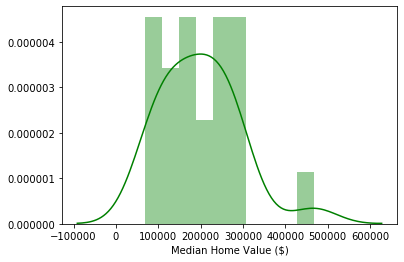

In [19]:
sns.distplot(School_data['Median Home Value ($)'],bins=10, color = 'green')

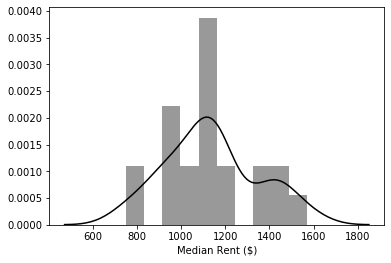

In [20]:
sns.distplot(School_data['Median Rent ($)'],bins=10, color ='black')

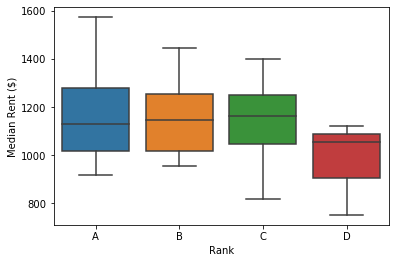

In [21]:
sns.boxplot(x='Rank', y= 'Median Rent ($)', data=School_data)

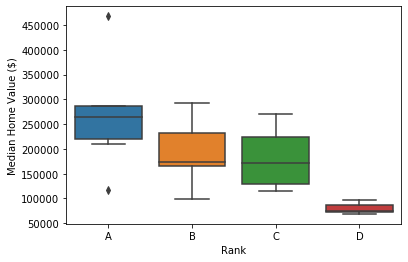

In [22]:
sns.boxplot(x='Rank', y= 'Median Home Value ($)', data=School_data)

In [23]:
json_data = pd.read_json('NC_Counties.geojson')

In [24]:
address = 'Matthews, NC'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
Lat = location.latitude
Long = location.longitude
print('The geograpical coordinate of Matthews, NC are {}, {}.'.format(Lat, Long))

The geograpical coordinate of Matthews, NC are 35.1170873, -80.723718.


In [25]:
NC_School_map = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(School_data['Lat'], School_data['Long'], School_data['School Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7).add_to(NC_School_map)  
    
NC_School_map

In [26]:
# Save NC_School_map
NC_School_map.save('NC_School_map.html')

In [27]:
group_by_rank = School_data.groupby(by=['Rank'])
group_by_rank

In [96]:
group_by_rank = School_data.groupby(by=['Rank'])
Rank_grouped_df = group_by_rank.count().reset_index()
Rank_grouped_df

,Rank,School Name,Street Address,Zip,City,Neighborhood,Median Rent ($),Median Home Value ($),Lat,Long
0,A,7,7,7,7,7,7,7,7,7
1,B,8,8,8,8,8,8,8,8,8
2,C,4,4,4,4,4,4,4,4,4
3,D,3,3,3,3,3,3,3,3,3


In [101]:
group_by_rank = School_data.groupby(by=['City'])
Rank_grouped_df = group_by_rank.count().reset_index()
Rank_grouped_df.head(25)

,City,School Name,Street Address,Zip,Neighborhood,Rank,Median Rent ($),Median Home Value ($),Lat,Long
0,Charlotte,14,14,14,14,14,14,14,14,14
1,Cornelius,1,1,1,1,1,1,1,1,1
2,Huntersville,4,4,4,4,4,4,4,4,4
3,Matthews,2,2,2,2,2,2,2,2,2
4,Mint Hill,1,1,1,1,1,1,1,1,1


In [97]:
group_by_rank = School_data.groupby(by=['Rank'])
Rank_grouped_df = group_by_rank.mean().reset_index()
Rank_grouped_df

,Rank,Zip,Median Rent ($),Median Home Value ($),Lat,Long
0,A,28209.428571,1171.714286,266008.285714,35.186594,-80.769205
1,B,28180.875000,1164.875000,191959.000000,35.206887,-80.813438
2,C,28179.500000,1135.000000,182093.750000,35.270413,-80.821485
3,D,28165.666667,976.000000,80148.000000,35.267466,-80.843437


In [30]:
# Save NC_School_data as csv file
Rank_grouped_df.to_csv('School_Rank_Grouped.csv')

In [31]:
address = 'Huntersville, NC'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
Lat = location.latitude
Long = location.longitude
print('The geograpical coordinate of Huntersville, NC are {}, {}.'.format(Lat, Long))

The geograpical coordinate of Huntersville, NC are 35.410845, -80.8429094.


In [32]:
#hist = School Ranking
#Median Rent ($)
#Median Home Value ($)
#School_Rank_Grouped.csv

In [33]:
School_data.shape
print('The dataframe has', School_data.shape, 'rows and columns respectively.')

The dataframe has (22, 10) rows and columns respectively.


In [34]:
address = '1800 Pineville-Matthews Road, Charlotte,NC 27412'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
Latitude = location.latitude
Longitude = location.longitude
print('The geograpical coordinate of Providence High School, Charlotte,NC 27412 is {}, {}.'.format(Latitude, Longitude))

The geograpical coordinate of Providence High School, Charlotte,NC 27412 is 35.110148, -80.761796.


In [35]:
HS_data = School_data[School_data.City == 'Charlotte']
print('The dataframe has', HS_data.shape, 'rows and columns respectively.')
HS_data.reset_index()

The dataframe has (14, 10) rows and columns respectively.


,index,School Name,Street Address,Zip,City,Neighborhood,Rank,Median Rent ($),Median Home Value ($),Lat,Long
0,0,Ardrey Kell HS,2401 Belfast Dr,28208,Charlotte,Provincetowne,A,1572.0,287402.0,35.029990,-80.826650
1,1,Cato HS,6108 Wilora Lake Rd,28212,Charlotte,Back Creek Church Road,A,1112.0,210229.0,35.264861,-80.731168
2,3,East Mecklenburg HS,6800 Monroe Rd,28212,Charlotte,East Forest,B,955.0,99587.0,35.176007,-80.757978
3,4,Garinger HS,1100 Eastway Dr,28205,Charlotte,Plaza-Shamrock,C,817.0,133512.0,35.241087,-80.782875
4,6,Harper Middle College High,315 West Hebron Street,28273,Charlotte,Montclaire South,A,919.0,117686.0,35.105820,-80.694511
5,8,Independence HS,7101 Idlewild Rd,28212,Charlotte,Mint Hill,B,1035.0,234800.0,35.197168,-80.687432
6,11,Metro School,405 S Davidson St,28202,Charlotte,Uptown,A,1401.0,263826.0,35.219300,-80.842700
7,12,Myers Park HS,7905 Pleasant Grove Rd,28216,Charlotte,Oakdale North,B,1442.0,180700.0,35.170784,-80.833367
8,14,Olympic HS,4301 Sandy Porter Rd,28273,Charlotte,Olde Whitehall,B,1191.0,164936.0,35.158260,-80.952937
9,15,Providence HS,1800 Pineville-Matthews Rd,28270,Charlotte,Hembstead,A,918.0,467715.0,35.110344,-80.763887


In [36]:
address = 'Matthews, NC'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
Lat = location.latitude
Long = location.longitude
print('The geograpical coordinate of Matthews, NC are {}, {}.'.format(Lat, Long))

The geograpical coordinate of Matthews, NC are 35.1170873, -80.723718.


In [37]:
map_schools = folium.Map(location=[Lat, Long], zoom_start=10)

# add markers to map
for lat, lng, label in zip(HS_data['Lat'], HS_data['Long'], HS_data['School Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_schools)  
    
map_schools

In [38]:
print('One of the High Schools in Charlotte is', HS_data.loc[15, 'School Name'])

One of the High Schools in Charlotte is Providence HS


In [39]:
school_latitude = HS_data.loc[15, 'Lat'] # School latitude value
school_longitude = HS_data.loc[15, 'Long'] # SchoolSchool longitude value

HS_name = HS_data.loc[15, 'School Name'] # School name

print('Latitude and longitude values of {} are {}, {}.'.format(HS_name, 
                                                               school_latitude, 
                                                               school_longitude))

Latitude and longitude values of Providence HS are 35.110344, -80.763887.


In [40]:
CLIENT_ID = 'FPXRYOQ0JH4IGRMNO1GZYJOFJWXQT0BOENRLV4QCDRZXJJR2' # your Foursquare ID
CLIENT_SECRET = '3L4IDBXHI4IC2FKRMYJOGR2ZG5XJO2NU3PW4O0UT2UXPYWMB' # your Foursquare Secret
VERSION = '20191130'
LIMIT = 100
radius = 1000
print('Raveena credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Raveena credentails:
CLIENT_ID: FPXRYOQ0JH4IGRMNO1GZYJOFJWXQT0BOENRLV4QCDRZXJJR2
CLIENT_SECRET:3L4IDBXHI4IC2FKRMYJOGR2ZG5XJO2NU3PW4O0UT2UXPYWMB


In [41]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    school_latitude, 
    school_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FPXRYOQ0JH4IGRMNO1GZYJOFJWXQT0BOENRLV4QCDRZXJJR2&client_secret=3L4IDBXHI4IC2FKRMYJOGR2ZG5XJO2NU3PW4O0UT2UXPYWMB&v=20191130&ll=35.110344,-80.763887&radius=1000&limit=100'

In [42]:
results = requests.get(url).json()

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [103]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Providence High School,High School,35.110790,-80.763640
1,Providence Locker Room,Gym / Fitness Center,35.110334,-80.763120
2,EHQ Providence,Café,35.110324,-80.763133
3,Providence Baseball Field,Baseball Field,35.113034,-80.766660
4,Timm Young Films,Film Studio,35.111225,-80.768765
5,Providence HS Softball Field,Baseball Field,35.114574,-80.763888
6,Spa4,Spa,35.110820,-80.771244
7,The ROC,Gym,35.112896,-80.755399
8,Beverly Crest Swim Club,Gym Pool,35.111869,-80.774106


In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
school_venues = getNearbyVenues(names=HS_data['Neighborhood'],
                                   latitudes=HS_data['Lat'],
                                   longitudes=HS_data['Long']
                                  )

Provincetowne
Back Creek Church Road
East Forest
Plaza-Shamrock
Montclaire South
Mint Hill
Uptown
Oakdale North
Olde Whitehall
Hembstead
Park Crossing
Mineral Springs
University Park
Pawtuckett


In [48]:
print('There are', school_venues.shape, 'rows and columns venues and High Schools in Charlotte.')
school_venues.head(5)

There are (262, 7) rows and columns venues and High Schools in Charlotte.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Provincetowne,35.029990,-80.826650,Knights Stadium,35.030504,-80.824622,Football Stadium
1,Provincetowne,35.029990,-80.826650,CHMS Track,35.036974,-80.825001,Track
2,Provincetowne,35.029990,-80.826650,Masters Stone Group,35.035066,-80.819833,Home Service
3,Provincetowne,35.029990,-80.826650,Smokestation LLC,35.023969,-80.832617,Smoke Shop
4,Back Creek Church Road,35.264861,-80.731168,QuikTrip,35.258034,-80.736416,Convenience Store


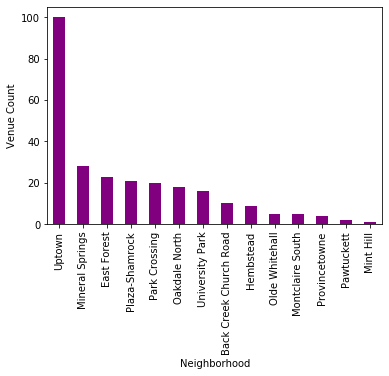

In [49]:
plot1=school_venues["Neighborhood"].value_counts().plot(kind = "bar", color = "purple")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')
plot1

In [51]:
school_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Back Creek Church Road,10,10,10,10,10,10
East Forest,23,23,23,23,23,23
Hembstead,9,9,9,9,9,9
Mineral Springs,28,28,28,28,28,28
Mint Hill,1,1,1,1,1,1
Montclaire South,5,5,5,5,5,5
Oakdale North,18,18,18,18,18,18
Olde Whitehall,5,5,5,5,5,5
Park Crossing,20,20,20,20,20,20


In [52]:
print('There are {} uniques categories.'.format(len(school_venues['Venue Category'].unique())))

There are 122 uniques categories.


In [53]:
# one hot encoding
school_onehot = pd.get_dummies(school_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
school_onehot['Neighborhood'] = school_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [school_onehot.columns[-1]] + list(school_onehot.columns[:-1])
school_onehot = school_onehot[fixed_columns]

school_onehot.head()

,Women's Store,ATM,Accessories Store,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Big Box Store,Boutique,Breakfast Spot,Burrito Place,Cafeteria,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop,Fast Food Restaurant,Film Studio,Fish Market,Flower Shop,Food,Food Truck,Football Stadium,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Library,Lounge,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Museum,Neighborhood,New American Restaurant,Office,Optical Shop,Other Nightlife,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pub,Record Shop,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Soccer Field,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sports Bar,Steakhouse,Storage Facility,Supermarket,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Provincetowne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Provincetowne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Provincetowne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Provincetowne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Back Creek Church Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
school_onehot.shape
print('The dataframe has', school_onehot.shape, 'rows and columns respectively.')

The dataframe has (262, 122) rows and columns respectively.


In [55]:
school_grouped = school_onehot.groupby('Neighborhood').mean().reset_index()
school_grouped

,Neighborhood,Women's Store,ATM,Accessories Store,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Big Box Store,Boutique,Breakfast Spot,Burrito Place,Cafeteria,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop,Fast Food Restaurant,Film Studio,Fish Market,Flower Shop,Food,Food Truck,Football Stadium,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Library,Lounge,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Museum,New American Restaurant,Office,Optical Shop,Other Nightlife,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pub,Record Shop,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Soccer Field,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sports Bar,Steakhouse,Storage Facility,Supermarket,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Back Creek Church Road,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0000,0.00,0.00,0.00,0.00,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.100000,0.000000,0.00,0.000000,0.00,0.200000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.200000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0000,0.00,0.000000,0.00,0.00,0.000000,0.200000,0.00,0.0,0.00,0.000000,0.00,0.10,0.000000,0.000000,0.000000
1,East Forest,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0000,0.00,0.00,0.00,0.00,0.043478,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.043478,0.00,0.043478,0.00,0.043478,0.000000,0.00,0.00,0.00,0.043478,0.000000,0.00,0.086957,0.000000,0.086957,0.000000,0.000000,0.043478,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.043478,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.086957,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.043478,0.000000,0.086957,0.043478,0.00,0.00,0.000000,0.043478,0.000000,0.00,0.0000,0.000000,0.0,0.0000,0.000000,0.000000,0.043478,0.00,0.000000,0.00,0.00,0.000000,0.0000,0.00,0.000000,0.00,0.00,0.043478,0.000000,0.00,0.0,0.00,0.043478,0.00,0.00,0.000000,0.000000,0.043478
2,Hembstead,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0000,0.00,0.00,0.00,0.00,0.222222,0.0000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00

In [56]:
num_top_venues = 5

for hood in school_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = school_grouped[school_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Back Creek Church Road----
                venue  freq
0      Discount Store   0.2
1   Convenience Store   0.2
2         Supermarket   0.2
3         Gas Station   0.1
4  Chinese Restaurant   0.1


----East Forest----
                  venue  freq
0          Intersection  0.09
1           Pizza Place  0.09
2  Fast Food Restaurant  0.09
3        Discount Store  0.09
4        Shop & Service  0.04


----Hembstead----
            venue  freq
0  Baseball Field  0.22
1             Gym  0.11
2            Café  0.11
3             Spa  0.11
4     High School  0.11


----Mineral Springs----
                     venue  freq
0   Furniture / Home Store  0.18
1               Food Truck  0.18
2               Shoe Store  0.07
3           Clothing Store  0.07
4  Scandinavian Restaurant  0.04


----Mint Hill----
           venue  freq
0    Supermarket   1.0
1  Women's Store   0.0
2         Museum   0.0
3            Pub   0.0
4           Pool   0.0


----Montclaire South----
                     venue

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
schools_venues_sorted = pd.DataFrame(columns=columns)
schools_venues_sorted['Neighborhood'] = school_grouped['Neighborhood']

for ind in np.arange(school_grouped.shape[0]):
    schools_venues_sorted.iloc[ind, 1:] = return_most_common_venues(school_grouped.iloc[ind, :], num_top_venues)

schools_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Back Creek Church Road,Convenience Store,Discount Store,Supermarket,Video Store,Fast Food Restaurant,Gas Station,Chinese Restaurant,Fish Market,Film Studio,Fabric Shop
1,East Forest,Intersection,Fast Food Restaurant,Discount Store,Pizza Place,Wings Joint,Baseball Field,Gas Station,Flower Shop,Department Store,Pet Store
2,Hembstead,Baseball Field,Café,Gym Pool,Gym / Fitness Center,Gym,High School,Film Studio,Spa,Flower Shop,Fish Market
3,Mineral Springs,Furniture / Home Store,Food Truck,Clothing Store,Shoe Store,Mattress Store,Pet Store,Department Store,Cosmetics Shop,Gym,Coffee Shop
4,Mint Hill,Supermarket,Wings Joint,Football Stadium,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop
5,Montclaire South,Wings Joint,Food Truck,Sandwich Place,Athletics & Sports,New American Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store
6,Oakdale North,Dessert Shop,Convenience Store,Soccer Field,Wine Bar,Gourmet Shop,Golf Course,Gastropub,Gas Station,Frozen Yogurt Shop,Fish Market
7,Olde Whitehall,Golf Driving Range,Auto Garage,Thai Restaurant,Hotel,Sculpture Garden,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Fabric Shop
8,Park Crossing,Pharmacy,Pizza Place,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Mexican Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Shipping Store,Juice Bar
9,Pawtuckett,Art Gallery,Furniture / Home Store,Wings Joint,Football Stadium,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop


In [59]:
schools_venues_sorted.shape
print('The dataframe has', schools_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (14, 11) rows and columns respectively.


In [60]:
# set number of clusters
kclusters = 3

schools_grouped_clustering = school_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(schools_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1], dtype=int32)

In [61]:
school_merged = HS_data

# add clustering labels
school_merged['Cluster Labels'] = kmeans.labels_

# merge data for each neighborhood
school_merged = school_merged.join(schools_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

school_merged

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,School Name,Street Address,Zip,City,Neighborhood,Rank,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ardrey Kell HS,2401 Belfast Dr,28208,Charlotte,Provincetowne,A,1572.0,287402.0,35.029990,-80.826650,0,Football Stadium,Track,Home Service,Smoke Shop,Deli / Bodega,Department Store,Cupcake Shop,Dessert Shop,Food Truck,Discount Store
1,Cato HS,6108 Wilora Lake Rd,28212,Charlotte,Back Creek Church Road,A,1112.0,210229.0,35.264861,-80.731168,0,Convenience Store,Discount Store,Supermarket,Video Store,Fast Food Restaurant,Gas Station,Chinese Restaurant,Fish Market,Film Studio,Fabric Shop
3,East Mecklenburg HS,6800 Monroe Rd,28212,Charlotte,East Forest,B,955.0,99587.0,35.176007,-80.757978,0,Intersection,Fast Food Restaurant,Discount Store,Pizza Place,Wings Joint,Baseball Field,Gas Station,Flower Shop,Department Store,Pet Store
4,Garinger HS,1100 Eastway Dr,28205,Charlotte,Plaza-Shamrock,C,817.0,133512.0,35.241087,-80.782875,0,Vietnamese Restaurant,Greek Restaurant,Women's Store,Baseball Field,Hobby Shop,Home Service,Gas Station,Food,Discount Store,Park
6,Harper Middle College High,315 West Hebron Street,28273,Charlotte,Montclaire South,A,919.0,117686.0,35.105820,-80.694511,2,Wings Joint,Food Truck,Sandwich Place,Athletics & Sports,New American Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store
8,Independence HS,7101 Idlewild Rd,28212,Charlotte,Mint Hill,B,1035.0,234800.0,35.197168,-80.687432,0,Supermarket,Wings Joint,Football Stadium,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop
11,Metro School,405 S Davidson St,28202,Charlotte,Uptown,A,1401.0,263826.0,35.219300,-80.842700,0,Hotel,American Restaurant,Pizza Place,Sandwich Place,Italian Restaurant,Steakhouse,Gym,Park,Art Museum,Theater
12,Myers Park HS,7905 Pleasant Grove Rd,28216,Charlotte,Oakdale North,B,1442.0,180700.0,35.170784,-80.833367,0,Dessert Shop,Convenience Store,Soccer Field,Wine Bar,Gourmet Shop,Golf Course,Gastropub,Gas Station,Frozen Yogurt Shop,Fish Market
14,Olympic HS,4301 Sandy Porter Rd,28273,Charlotte,Olde Whitehall,B,1191.0,164936.0,35.158260,-80.952937,0,Golf Driving Range,Auto Garage,Thai Restaurant,Hotel,Sculpture Garden,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Fabric Shop
15,Providence HS,1800 Pineville-Matthews Rd,28270,Charlotte,Hembstead,A,918.0,467715.0,35.110344,-80.763887,1,Baseball Field,Café,Gym Pool,Gym / Fitness Center,Gym,High School,Film Studio,Spa,Flower Shop,Fish Market


In [106]:
map_clusters = folium.Map(location=[Lat, Long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(school_merged['Lat'], school_merged['Long'], school_merged['Neighborhood'], school_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.88).add_to(map_clusters)
      
from folium.plugins import FloatImage
image_file = 'https://www.researchgate.net/profile/Philip_Cooley/publication/44633444/figure/fig3/AS:601651899535371@1520456399157/Public-Use-Microdata-Areas-for-Mecklenburg-County-NC.png'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

In [63]:
map_clusters.save('map_SchoolCluster.html')

<Figure size 720x720 with 0 Axes>

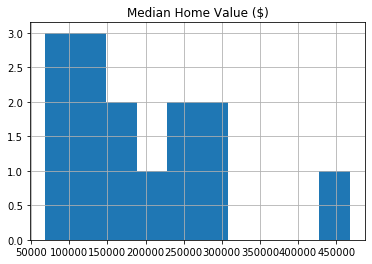

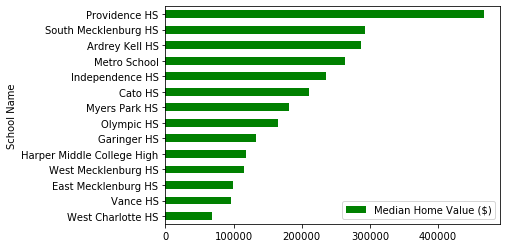

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
school_merged.hist(column='Median Home Value ($)')
school_merged.sort_values('Median Home Value ($)', inplace = True)
school_merged.plot(kind='barh',x='School Name',y='Median Home Value ($)', color='green'[cluster])
plt.show()

<Figure size 720x720 with 0 Axes>

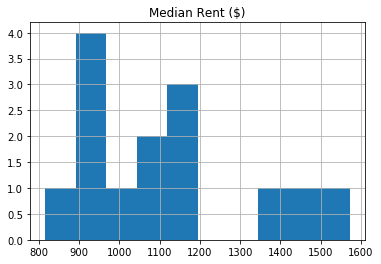

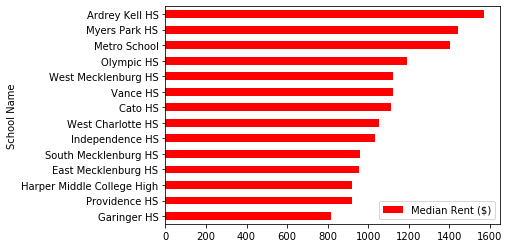

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
school_merged.hist(column='Median Rent ($)')
school_merged.sort_values('Median Rent ($)', inplace = True)
school_merged.plot(kind='barh',x='School Name',y='Median Rent ($)', color='red'[cluster])
plt.show()

In [91]:
Cluster1 = school_merged.loc[school_merged['Cluster Labels'] == 0, school_merged.columns[[1] + list(range(2, school_merged.shape[1]))]]
Cluster1

,Street Address,Zip,City,Neighborhood,Rank,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,1100 Eastway Dr,28205,Charlotte,Plaza-Shamrock,C,817.0,133512.0,35.241087,-80.782875,0,Vietnamese Restaurant,Greek Restaurant,Women's Store,Baseball Field,Hobby Shop,Home Service,Gas Station,Food,Discount Store,Park
3,6800 Monroe Rd,28212,Charlotte,East Forest,B,955.0,99587.0,35.176007,-80.757978,0,Intersection,Fast Food Restaurant,Discount Store,Pizza Place,Wings Joint,Baseball Field,Gas Station,Flower Shop,Department Store,Pet Store
17,13624 Steele Creek Rd,28273,Charlotte,Park Crossing,B,960.0,292306.0,35.109355,-80.860978,0,Pharmacy,Pizza Place,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,Mexican Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Shipping Store,Juice Bar
8,7101 Idlewild Rd,28212,Charlotte,Mint Hill,B,1035.0,234800.0,35.197168,-80.687432,0,Supermarket,Wings Joint,Football Stadium,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop
19,7400 Tuckaseegee Rd,28214,Charlotte,University Park,D,1055.0,68800.0,35.265404,-80.858453,0,Convenience Store,Fast Food Restaurant,Basketball Court,Automotive Shop,Seafood Restaurant,Pharmacy,Southern / Soul Food Restaurant,Sandwich Place,Chinese Restaurant,Gas Station
1,6108 Wilora Lake Rd,28212,Charlotte,Back Creek Church Road,A,1112.0,210229.0,35.264861,-80.731168,0,Convenience Store,Discount Store,Supermarket,Video Store,Fast Food Restaurant,Gas Station,Chinese Restaurant,Fish Market,Film Studio,Fabric Shop
18,800 Everett Place,28205,Charlotte,Mineral Springs,D,1122.0,95986.0,35.300403,-80.769214,0,Furniture / Home Store,Food Truck,Clothing Store,Shoe Store,Mattress Store,Pet Store,Department Store,Cosmetics Shop,Gym,Coffee Shop
20,4420 Denver Ave,28208,Charlotte,Pawtuckett,C,1122.0,115163.0,35.247920,-80.952017,0,Art Gallery,Furniture / Home Store,Wings Joint,Football Stadium,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Fabric Shop
14,4301 Sandy Porter Rd,28273,Charlotte,Olde Whitehall,B,1191.0,164936.0,35.158260,-80.952937,0,Golf Driving Range,Auto Garage,Thai Restaurant,Hotel,Sculpture Garden,Flower Shop,Fish Market,Film Studio,Fast Food Restaurant,Fabric Shop
11,405 S Davidson St,28202,Charlotte,Uptown,A,1401.0,263826.0,35.219300,-80.842700,0,Hotel,American Restaurant,Pizza Place,Sandwich Place,Italian Restaurant,Steakhouse,Gym,Park,Art Museum,Theater


In [68]:
Cluster1.describe()

,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels
count,12.000000,12.000000,12.000000,12.000000,12.0
mean,1148.666667,178937.250000,35.198378,-80.821314,0.0
std,221.212499,78369.945701,0.075793,0.081042,0.0
min,817.000000,68800.000000,35.029990,-80.952937,0.0
25%,1016.250000,111269.000000,35.167653,-80.859084,0.0
50%,1117.000000,172818.000000,35.208234,-80.830009,0.0
75%,1243.500000,242056.500000,35.252155,-80.766405,0.0
max,1572.000000,292306.000000,35.300403,-80.687432,0.0


<Figure size 720x720 with 0 Axes>

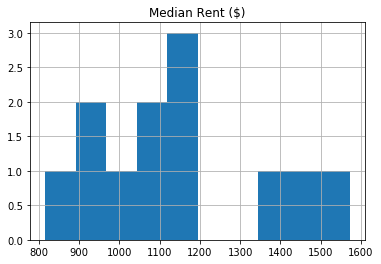

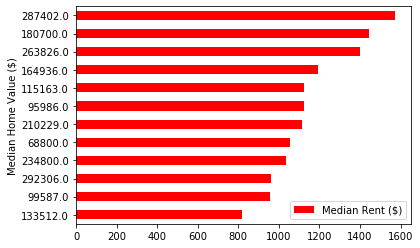

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
Cluster1.hist(column='Median Rent ($)')
Cluster1.sort_values('Median Rent ($)', inplace = True)
Cluster1.plot(kind='barh',x='Median Home Value ($)',y='Median Rent ($)', color='red'[cluster])
plt.show()

In [69]:
NHD = Cluster1.groupby(by = ['Rank'])
NHD_df = NHD.count()

NHD_df

,Street Address,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Rank,,,,,,,,,,,,,,,,
A,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
B,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
C,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
D,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [109]:
NHD = Cluster1.groupby(by = ['Rank'])
NHD_df = NHD.mean()

NHD_df

,Zip,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels
Rank,,,,,,
A,28207.333333,1361.666667,253819.0,35.171384,-80.800173,0
B,28237.200000,1116.600000,194465.8,35.162315,-80.818538,0
C,28206.500000,969.500000,124337.5,35.244504,-80.867446,0
D,28209.500000,1088.500000,82393.0,35.282904,-80.813834,0


In [70]:
Cluster2 = school_merged.loc[school_merged['Cluster Labels'] == 1, school_merged.columns[[1] + list(range(5, school_merged.shape[1]))]]
Cluster2

,Street Address,Rank,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,1800 Pineville-Matthews Rd,A,918.0,467715.0,35.110344,-80.763887,1,Baseball Field,Café,Gym Pool,Gym / Fitness Center,Gym,High School,Film Studio,Spa,Flower Shop,Fish Market


In [71]:
Cluster3 = school_merged.loc[school_merged['Cluster Labels'] == 2, school_merged.columns[[1] + list(range(5, school_merged.shape[1]))]]
Cluster3

,Street Address,Rank,Median Rent ($),Median Home Value ($),Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,315 West Hebron Street,A,919.0,117686.0,35.10582,-80.694511,2,Wings Joint,Food Truck,Sandwich Place,Athletics & Sports,New American Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store
